In [1]:
import joblib
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)

In [2]:
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'E:\egyptian house\Egypt_Houses_Price.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [3]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [4]:
df.describe()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
count,27361,27359,27158,27190,26890,27361,27361,27361,27361,27361,27361,27361
unique,11,4182,22,22,1073,3,14,560,4,10,5,183
top,Apartment,3000000,3,2,120.0,No,Unknown,Unknown,Cash or Installment,Ready to move,Finished,New Cairo - El Tagamoa
freq,8506,311,9784,7753,663,16500,10439,11068,10842,12142,14375,6789


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [6]:
# Get the count of null values in each column
null_counts_per_column = df.isnull().sum()

# Display the result
print(null_counts_per_column)

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64


In [7]:
# Get the percentage of null values in each column
null_percentage_per_column = (df.isnull().sum() / len(df)) * 100

# Display the result
print(null_percentage_per_column)

Type              0.000000
Price             0.007310
Bedrooms          0.741932
Bathrooms         0.624977
Area              1.721428
Furnished         0.000000
Level             0.000000
Compound          0.000000
Payment_Option    0.000000
Delivery_Date     0.000000
Delivery_Term     0.000000
City              0.000000
dtype: float64


In [8]:
# Specify the columns where you want to check for null values
columns_to_check = ['Price', 'Bedrooms', 'Bathrooms', 'Area']

# Remove rows with null values in the specified columns
df = df.dropna(subset=columns_to_check)

In [9]:
# Get the count of null values in each column
null_counts_per_column = df.isnull().sum()

# Display the result
print(null_counts_per_column)

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64


In [10]:
def show_countplot(col, data=df, a4_dims=(20,5)):
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(ax=ax, data=df, x=col)
    return

In [11]:
def show_countplot_with_hue(col, col2, data=df, a4_dims=(20,5)):
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(ax=ax, data=df, x=col, hue=col2)
    return

In [12]:
def remove_rows(df, column_to_filter, value_to_remove):
    # Remove rows where the specified column has the specified value
    df = df[df[column_to_filter] != value_to_remove]
    return 

In [13]:
def get_specific_rows(column_to_filter, specific_value):   
    # Filter rows where the specified column equals the specific value
    return df[df[column_to_filter] == specific_value]

In [14]:
def replace_specific_rows(column_to_replace, value_to_replace, replacement_value):
    # Replace the specified value with the replacement value in the specified column
    df[column_to_replace] = df[column_to_replace].replace(value_to_replace, replacement_value)
    return

In [15]:
# Filter out rows with non-numeric values in the "Area" column
df = df[pd.to_numeric(df['Price'], errors='coerce').notna()]

# Convert the "Area" column to integers
df['Price'] = df['Price'].astype(int)

In [16]:
remove_rows(df, 'Price', 'Unknown')

In [17]:
print(f"Min Price is {df['Price'].min()}")
print(f"Max Price is {df['Price'].max()}")
print(f"Price Mean is {int(df['Price'].mean())}")
print(f"Price Median is {int(df['Price'].median())}")

Min Price is 30000
Max Price is 205000000
Price Mean is 4387420
Price Median is 2685000


In [18]:
def get_quartiles(column_to_calculate_quartiles):
    # Calculate the first quartile (Q1), median (Q2), and fourth quartile (Q3)
    Q1 = df[column_to_calculate_quartiles].quantile(0.25)
    median = df[column_to_calculate_quartiles].quantile(0.5)
    Q3 = df[column_to_calculate_quartiles].quantile(0.75)

    # Display the quartile values
    print(f"First Quartile (Q1): {int(Q1)}")
    print(f"Median (Q2): {int(median)}")
    print(f"Third Quartile (Q3): {int(Q3)}")

In [19]:
get_quartiles('Price')

First Quartile (Q1): 1100000
Median (Q2): 2685000
Third Quartile (Q3): 5550000


In [20]:
# Specify the column and the specific value to filter
column_to_filter = 'Price'
specific_value = df[column_to_filter].max()

get_specific_rows(column_to_filter, specific_value)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
22257,Stand Alone Villa,205000000,7,6,377.0,No,Unknown,Unknown,Installment,Unknown,Finished,6th of October


In [21]:
# Specify the column and the specific value to filter
column_to_filter = 'Price'
specific_value = df[column_to_filter].min()

get_specific_rows(column_to_filter, specific_value)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
3128,Apartment,30000,3,2,150.0,No,2,2020 Compound,Cash or Installment,Unknown,Core & Shell,New Capital City
3993,Apartment,30000,3,1,120.0,No,5,Unknown,Cash,Ready to move,Finished,Nasr City
5224,Apartment,30000,4,3,263.0,No,1,El Khamayel,Cash,Ready to move,Finished,Sheikh Zayed
5528,Apartment,30000,3,3,140.0,No,5,Unknown,Unknown Payment,Ready to move,Semi Finished,New Cairo - El Tagamoa
8500,Apartment,30000,2,1,90.0,No,1,Unknown,Cash,Ready to move,Finished,Salam City


In [22]:
def convert_prices_to_levels(price):
    if price < 1000000:
        return 'A'
    elif price < 3000000:
        return 'B'
    elif price < 5000000:
        return 'C'
    elif price < df['Price'].max():
        return 'D'    

In [23]:
df['Price_Levels'] = df['Price'].apply(convert_prices_to_levels)

In [24]:
df['Price_Levels'].value_counts()

Price_Levels
B    8250
D    7742
A    6229
C    4471
Name: count, dtype: int64

In [25]:
remove_rows(df, 'Type', 'Unknown')

In [26]:
df['Type'].value_counts()

Type
Apartment            8499
Chalet               6589
Stand Alone Villa    4059
Town House           3067
Twin House           1787
Duplex                860
Standalone Villa      574
Penthouse             526
Twin house            483
Studio                249
Name: count, dtype: int64

In [27]:
replace_specific_rows('Type', 'Twin house', 'Twin House')

In [28]:
replace_specific_rows('Type', 'Standalone Villa', 'Stand Alone Villa')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


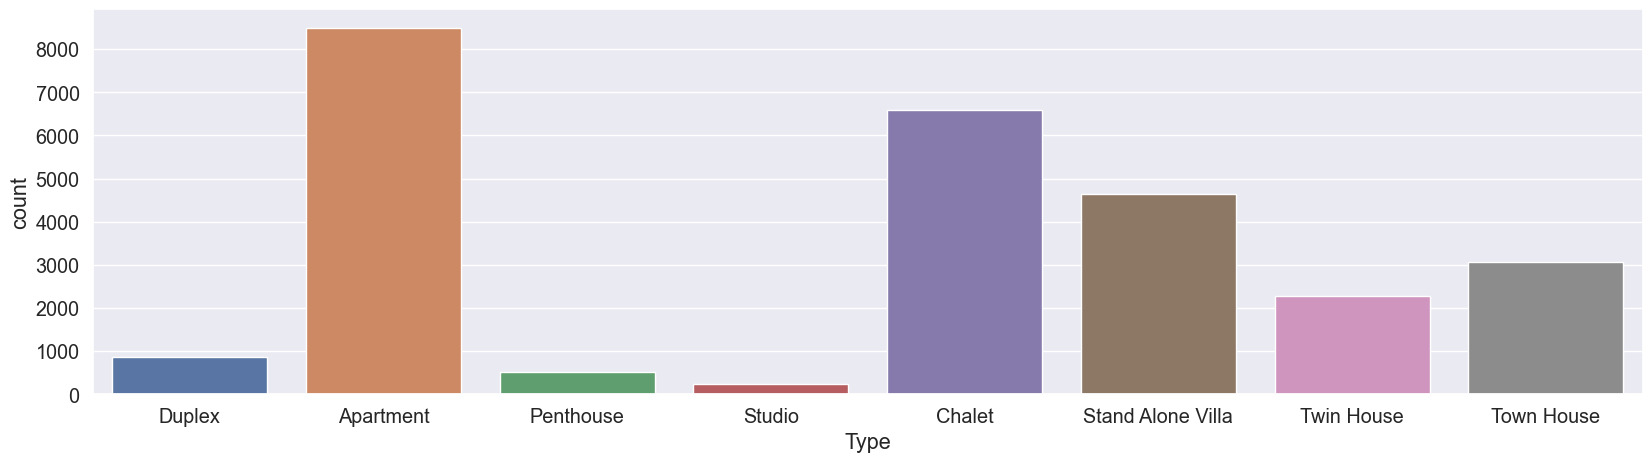

In [29]:
show_countplot("Type")

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

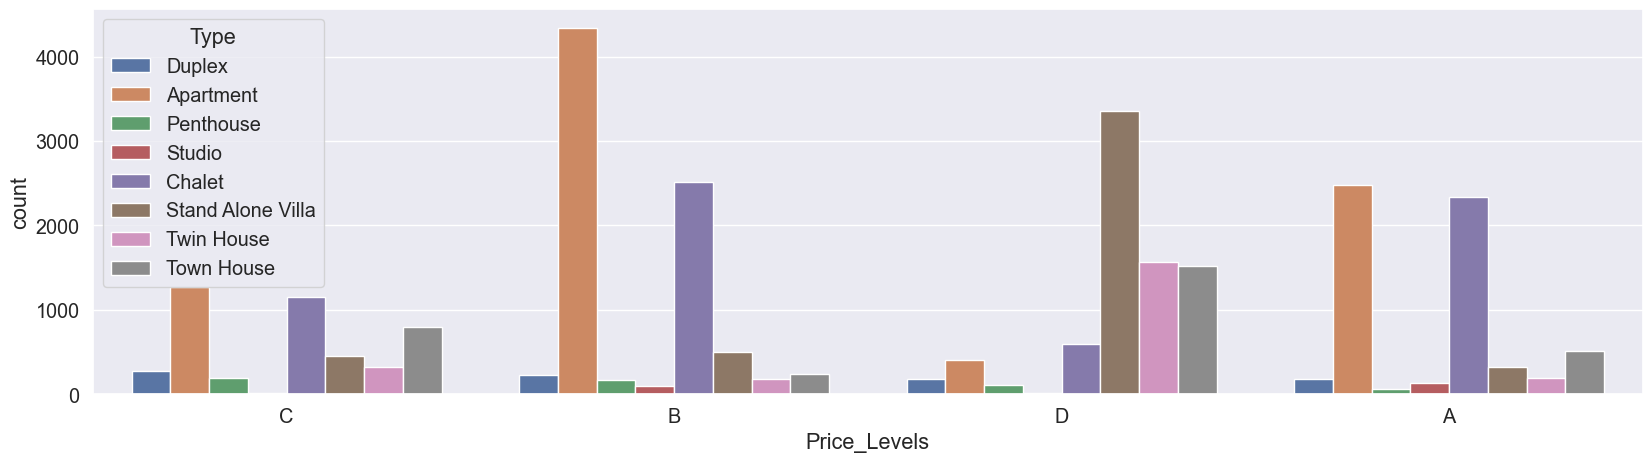

In [30]:
show_countplot_with_hue('Price_Levels', 'Type')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

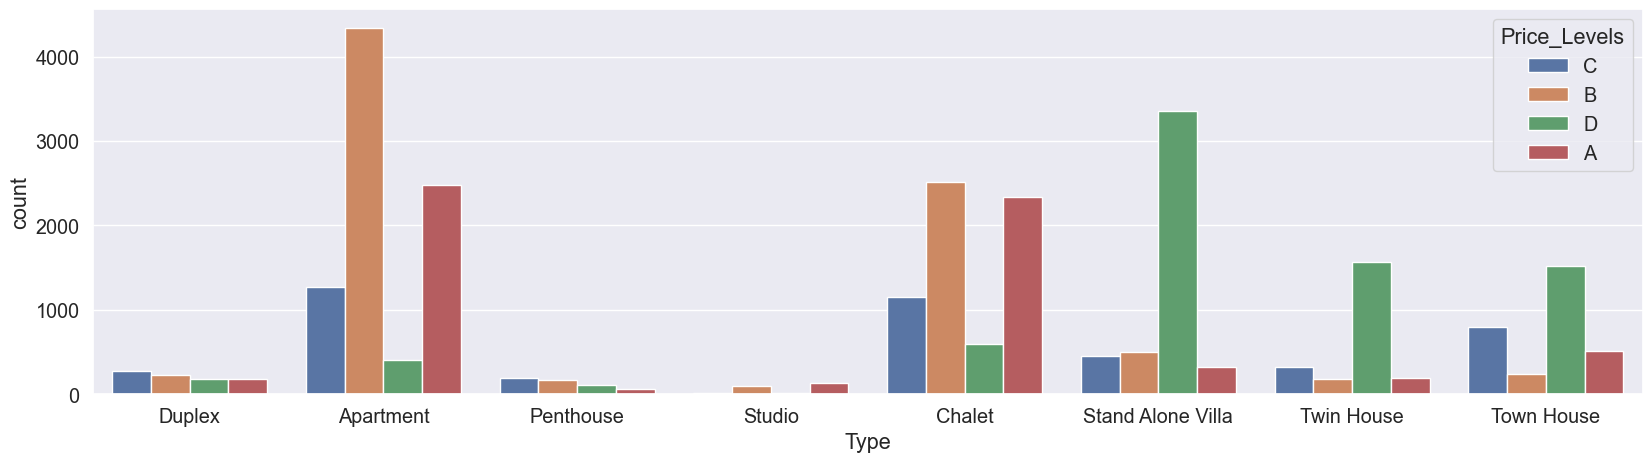

In [31]:
show_countplot_with_hue('Type', 'Price_Levels')

In [32]:
def get_statistical_info_about_col(col1, col2):
    # Use groupby to group by col1 and then find the maximum, minimum, mean, and median values for col2
    Max = df.groupby(col1)[col2].max()
    Min = df.groupby(col1)[col2].min()
    Mean = df.groupby(col1)[col2].mean()
    Median = df.groupby(col1)[col2].median()

    # Print the results
    print("Maximum values:")
    print(Max)
    print("----------------------------------")
    print("Minimum values:")
    print(Min)
    print("----------------------------------")
    print("Mean values:")
    print(round(Mean).astype(int))
    print("----------------------------------")
    print("Median values:")
    print(round(Median).astype(int))
    print("----------------------------------")

In [33]:
# Example usage
col1 = 'Type'
col2 = 'Price'
get_statistical_info_about_col(col1, col2)

Maximum values:
Type
Apartment             42000000
Chalet                69000000
Duplex                24000000
Penthouse             25000000
Stand Alone Villa    205000000
Studio                 6500000
Town House            47580000
Twin House            26700000
Name: Price, dtype: int32
----------------------------------
Minimum values:
Type
Apartment             30000
Chalet                33000
Duplex                40000
Penthouse            125000
Stand Alone Villa     36000
Studio                45000
Town House           100000
Twin House            50000
Name: Price, dtype: int32
----------------------------------
Mean values:
Type
Apartment             1986442
Chalet                2313763
Duplex                3286486
Penthouse             3628321
Stand Alone Villa    10690653
Studio                1326822
Town House            4872691
Twin House            6804266
Name: Price, dtype: int32
----------------------------------
Median values:
Type
Apartment            1650

In [34]:
df['Bedrooms'].value_counts()

Bedrooms
3       9766
2       4757
4       4170
3.0     2011
5       1794
4.0      960
1        888
2.0      777
6        557
5.0      441
1.0      162
7        137
6.0      123
8         47
7.0       33
9         27
10        25
9.0        7
10.0       7
8.0        3
10+        1
Name: count, dtype: int64

In [35]:
# Convert the "Bedrooms" column to numeric, handling errors by setting them to NaN
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')

# Convert the "Bedrooms" column to integers, NaN values will become integers too
df['Bedrooms'] = df['Bedrooms'].astype('Int64')

In [36]:
# Specify the columns where you want to check for null values
columns_to_check = ['Bedrooms']

# Remove rows with null values in the specified columns
df = df.dropna(subset=columns_to_check)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


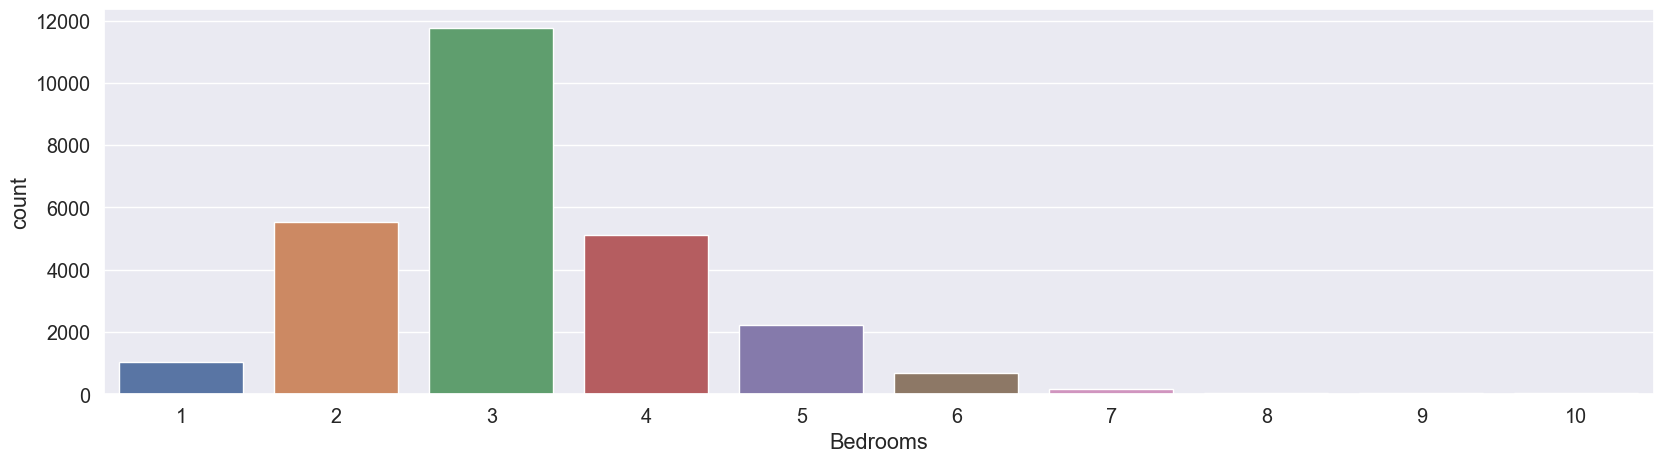

In [37]:
show_countplot('Bedrooms')

In [38]:
df['Bedrooms'].value_counts()

Bedrooms
3     11777
2      5534
4      5130
5      2235
1      1050
6       680
7       170
8        50
9        34
10       32
Name: count, dtype: Int64

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

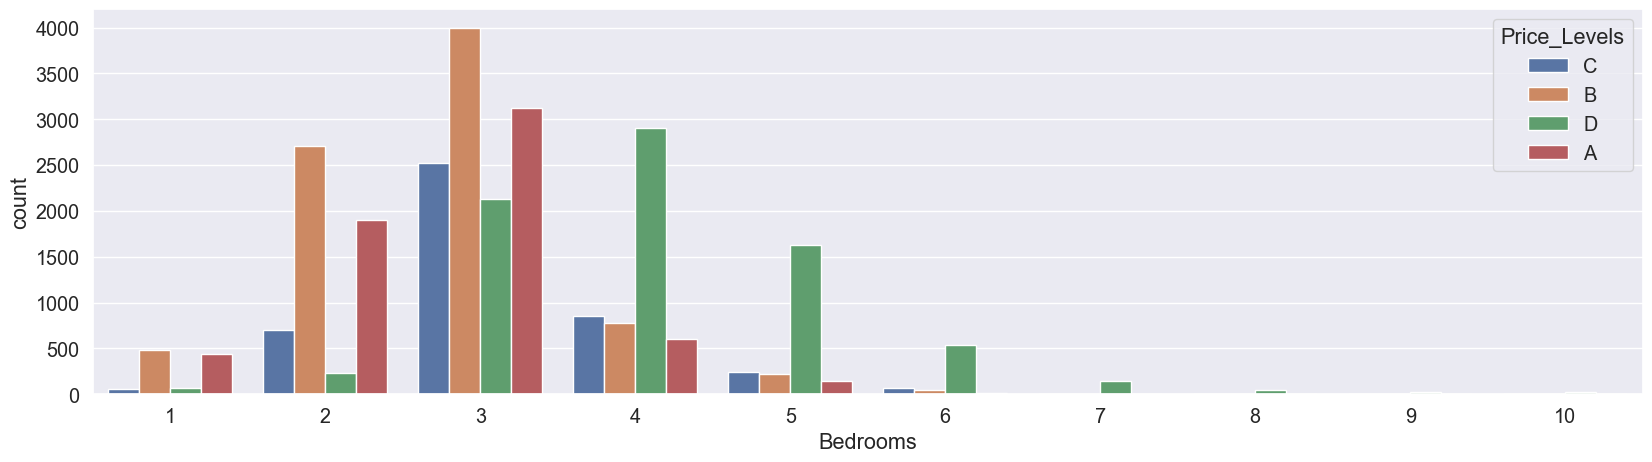

In [39]:
show_countplot_with_hue('Bedrooms', 'Price_Levels')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

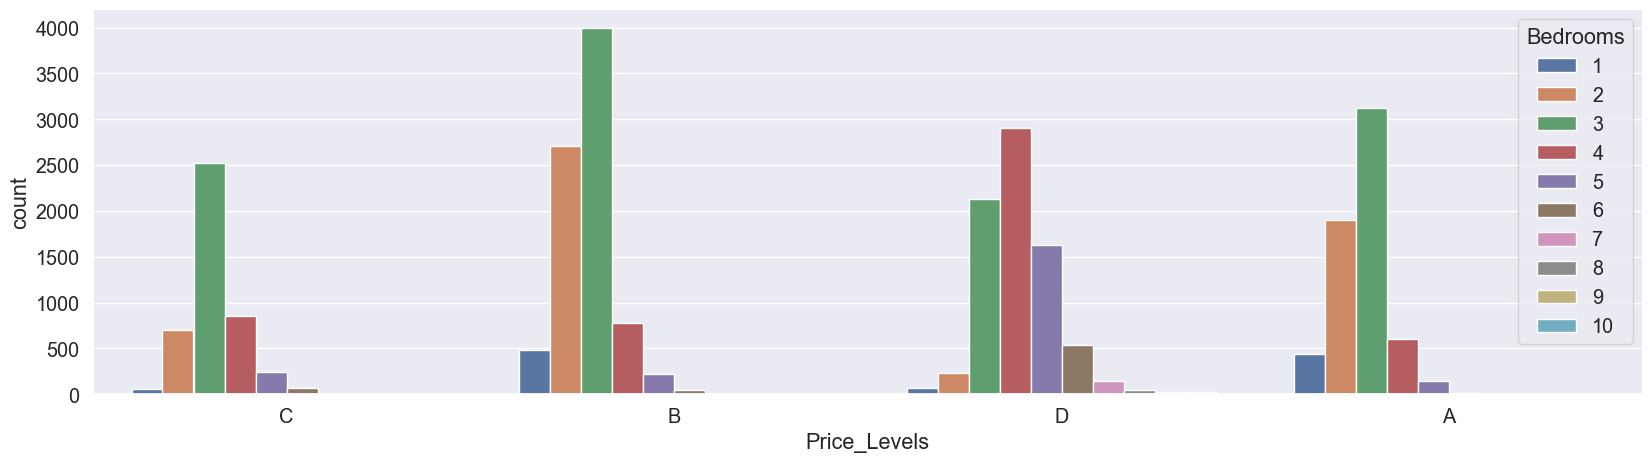

In [40]:
show_countplot_with_hue('Price_Levels', 'Bedrooms')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

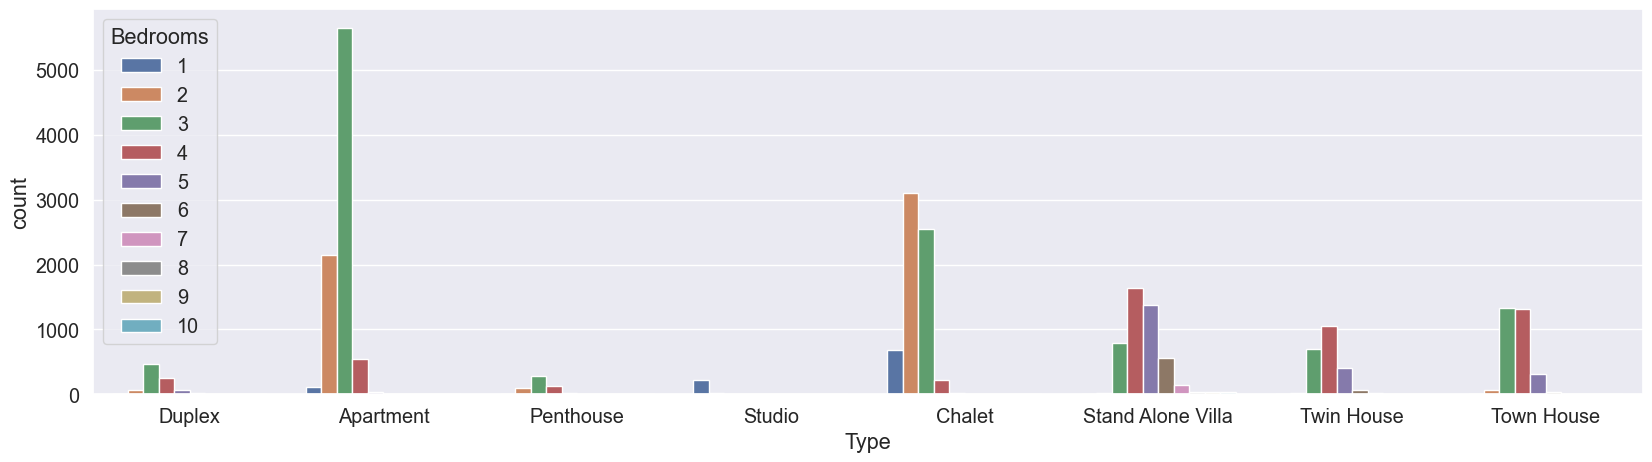

In [41]:
show_countplot_with_hue( 'Type', 'Bedrooms')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

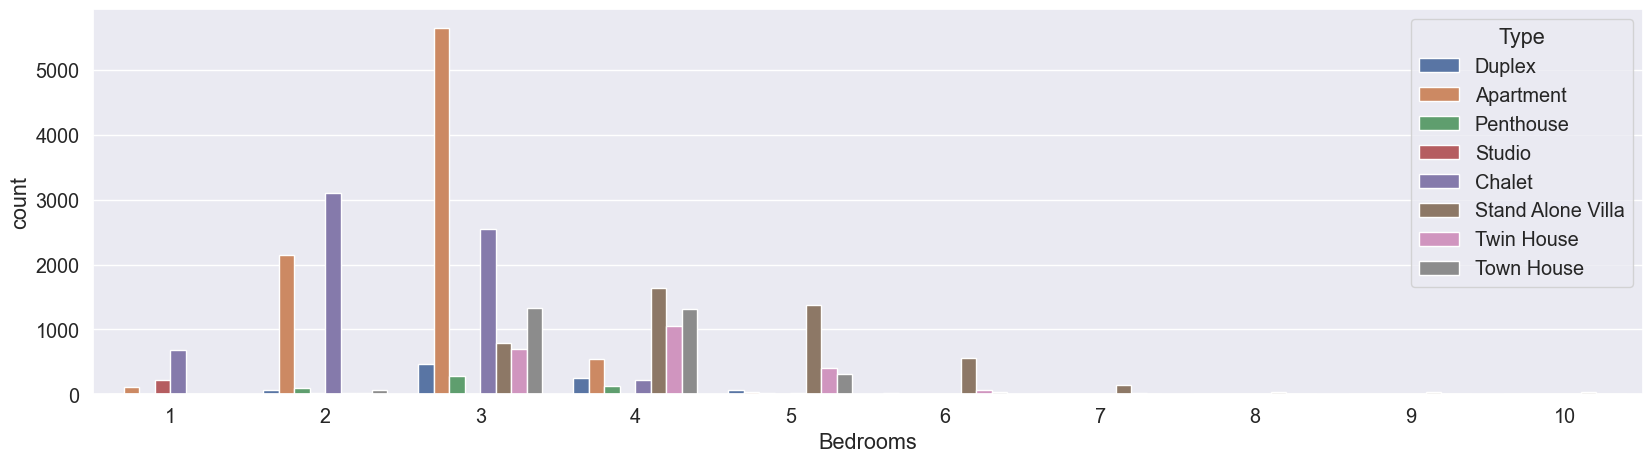

In [42]:
show_countplot_with_hue('Bedrooms', 'Type')

In [43]:
# Example usage
col1 = 'Bedrooms'
col2 = 'Price'
get_statistical_info_about_col(col1, col2)

Maximum values:
Bedrooms
1      63050003
2      20628000
3      69000000
4      68000000
5      80000000
6      63031968
7     205000000
8     100000000
9      39000000
10     60000000
Name: Price, dtype: int32
----------------------------------
Minimum values:
Bedrooms
1       45000
2       30000
3       30000
4       30000
5       36000
6       70000
7       50000
8      900000
9     2860000
10    3000000
Name: Price, dtype: int32
----------------------------------
Mean values:
Bedrooms
1      1697015
2      1892868
3      3131254
4      6565754
5      9528497
6     12691599
7     16011618
8     13382394
9     15662061
10    13914062
Name: Price, dtype: int32
----------------------------------
Median values:
Bedrooms
1      1237000
2      1700000
3      2300000
4      5500000
5      7800000
6     10440000
7     10950000
8      8550000
9     11000000
10    11100000
Name: Price, dtype: int32
----------------------------------


In [44]:
get_specific_rows('Price', 63050003)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City,Price_Levels
12696,Chalet,63050003,1,1,85.0,Yes,4,Unknown,Cash,Ready to move,Finished,North Coast,D


In [45]:
df['Bathrooms'].value_counts()

Bathrooms
2       7742
3       6092
4       3166
1       3148
2.0     1433
5       1374
3.0     1370
4.0      694
1.0      532
6        415
5.0      350
7        152
6.0       92
8         49
7.0       33
10        17
9         13
8.0       13
9.0        4
10.0       3
Name: count, dtype: int64

In [46]:
# Convert the "Bedrooms" column to numeric, handling errors by setting them to NaN
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')

# Convert the "Bedrooms" column to integers, NaN values will become integers too
df['Bathrooms'] = df['Bathrooms'].astype('Int64')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


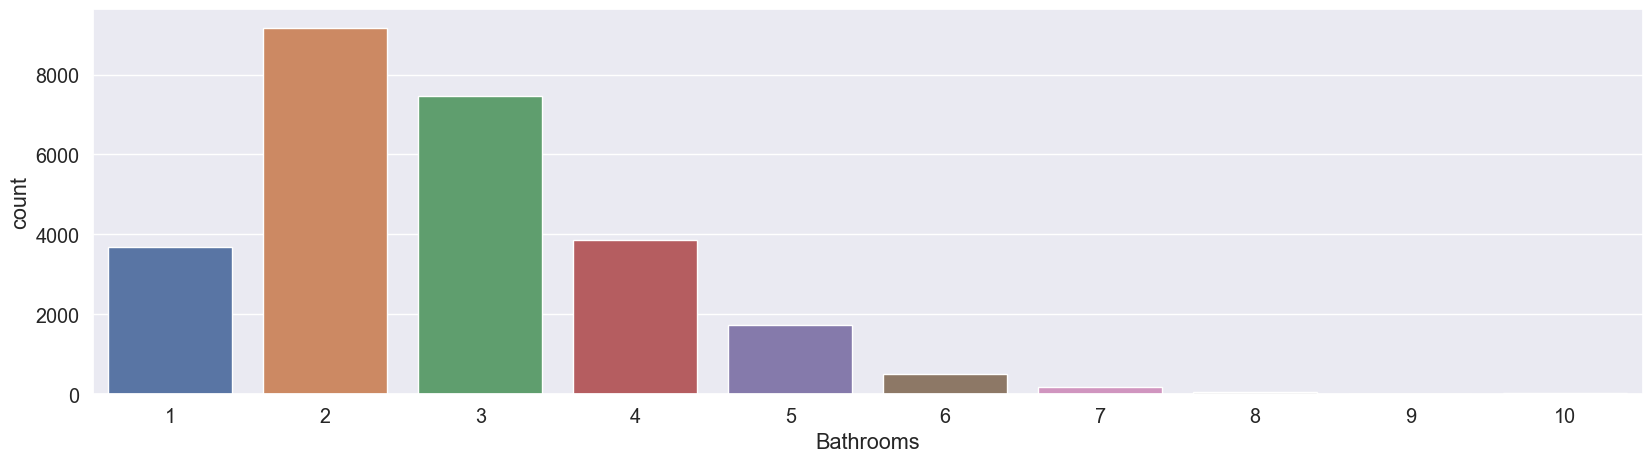

In [47]:
show_countplot('Bathrooms')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

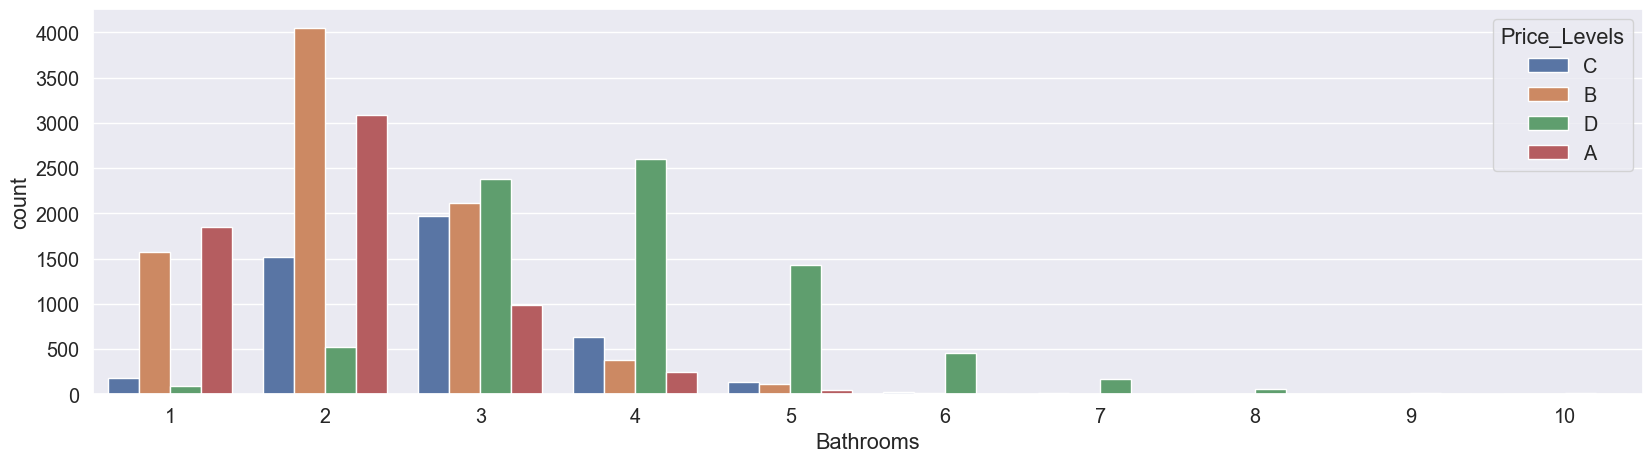

In [48]:
show_countplot_with_hue('Bathrooms', 'Price_Levels')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

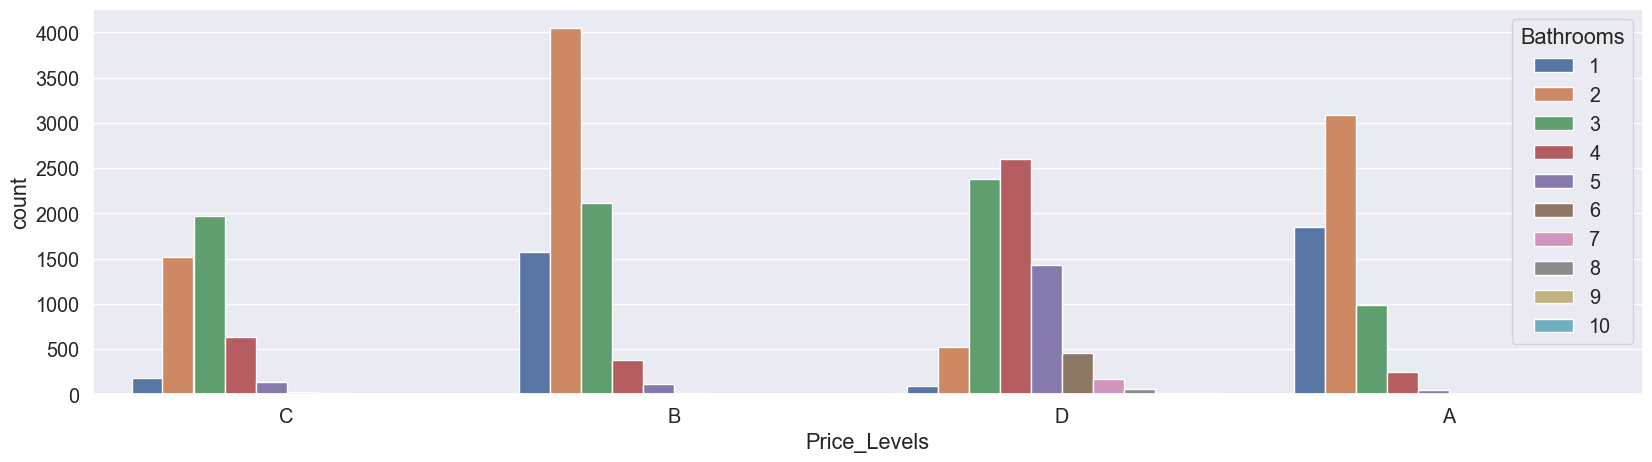

In [49]:
show_countplot_with_hue('Price_Levels','Bathrooms')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

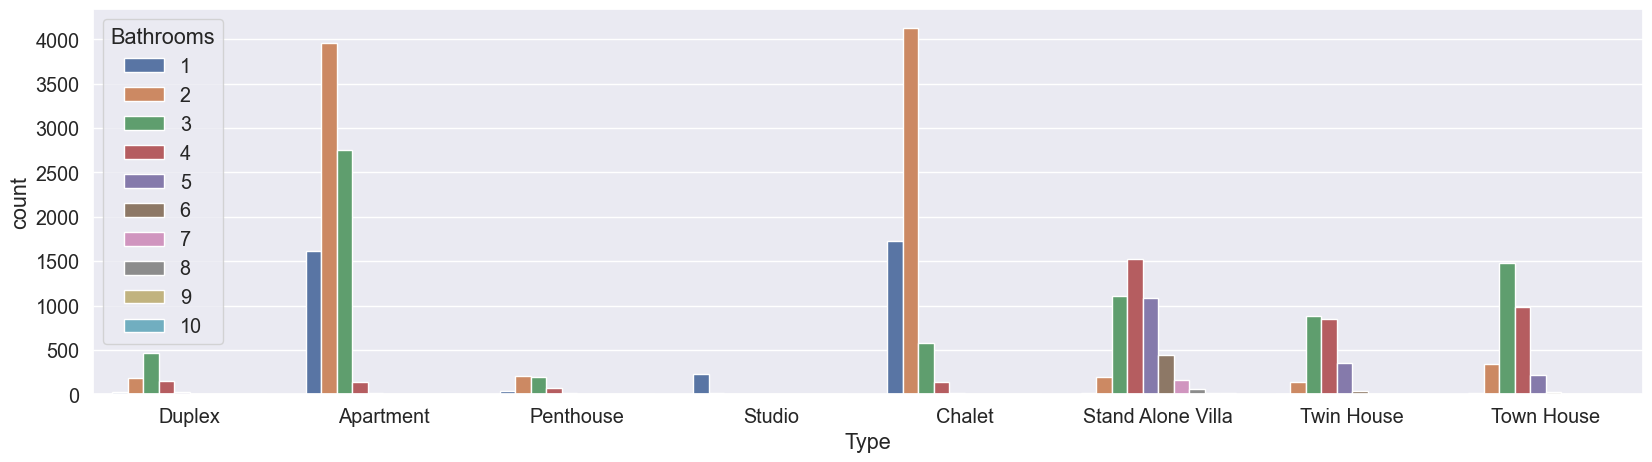

In [50]:
show_countplot_with_hue('Type', 'Bathrooms')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

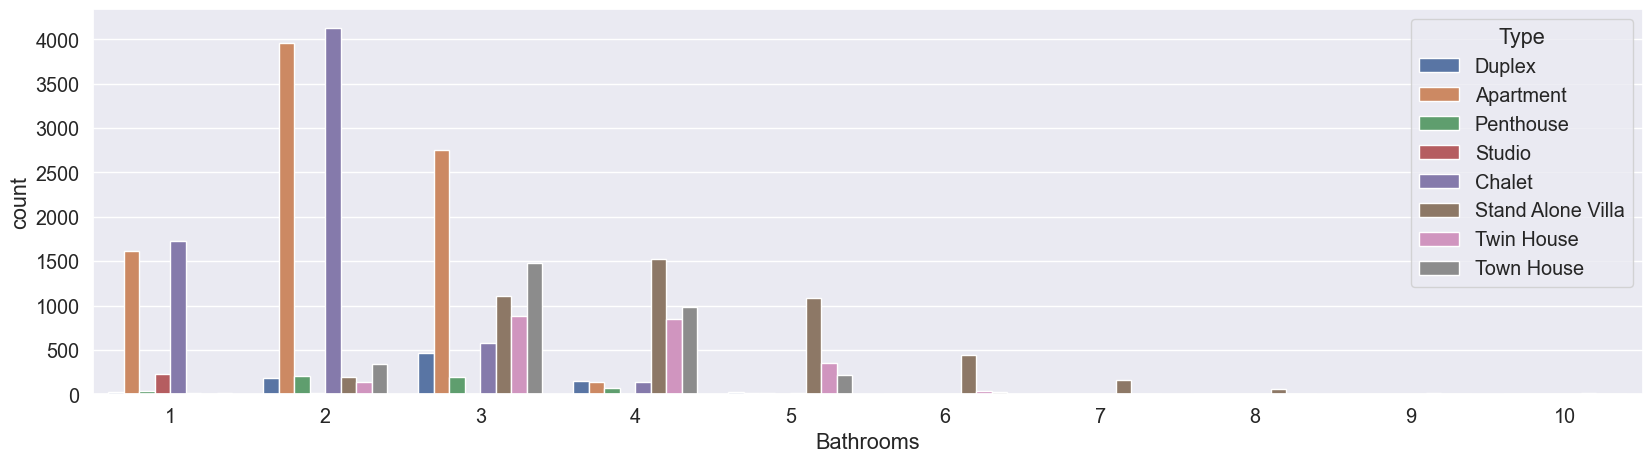

In [51]:
show_countplot_with_hue('Bathrooms','Type')

In [52]:
# Example usage
col1 = 'Bathrooms'
col2 = 'Price'
get_statistical_info_about_col(col1, col2)

Maximum values:
Bathrooms
1      63050003
2      40837000
3      69000000
4      80000000
5      80000000
6     205000000
7      64475000
8     110000000
9      65000000
10     48000000
Name: Price, dtype: int32
----------------------------------
Minimum values:
Bathrooms
1       30000
2       30000
3       30000
4       50000
5       36000
6      380000
7      450000
8     2860000
9     3900000
10    3250000
Name: Price, dtype: int32
----------------------------------
Mean values:
Bathrooms
1      1358522
2      2068095
3      4389055
4      7469853
5     11061242
6     14172908
7     17956798
8     21228677
9     20061770
10    15902500
Name: Price, dtype: int32
----------------------------------
Median values:
Bathrooms
1       990000
2      1713000
3      3500000
4      6500000
5      9200000
6     12000000
7     15000000
8     13767000
9     15000000
10    13750000
Name: Price, dtype: int32
----------------------------------


In [53]:
# Convert the "Area" column to numeric, handling errors by setting them to NaN
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# Drop rows with NaN values in the "Area" column
df = df[df['Area'].notna()]

# Convert the "Area" column to integers
df['Area'] = df['Area'].astype(int)

In [54]:
print(f"Min Area is {df['Area'].min()}")
print(f"Max Area is {df['Area'].max()}")
print(f"Mean of Area is {int(df['Area'].mean())}")
print(f"Median of Area is {int(df['Area'].median())}")

Min Area is 10
Max Area is 995
Mean of Area is 226
Median of Area is 175


In [55]:
get_specific_rows('Area', 10)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City,Price_Levels
7345,Apartment,1500000,3,3,10,No,4,Unknown,Unknown Payment,Ready to move,Unknown,New Cairo - El Tagamoa,B
10185,Chalet,70000,2,2,10,Yes,Unknown,Fanar De Luna,Cash,Ready to move,Finished,Ain Sukhna,A


In [56]:
get_specific_rows('Area', 995)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City,Price_Levels
15454,Stand Alone Villa,14400000,6,5,995,No,Unknown,Hacienda Bay,Installment,Unknown,Semi Finished,North Coast,D


In [57]:
def convert_Area_to_levels(area):
    if area < 100:
        return 100
    elif area < 150:
        return 150
    elif area < 200:
        return 200
    elif area < 300:
        return 300 
    elif area < 500:
        return 500
    elif area < 1000:
        return 1000

In [58]:
df["Area_Levels"] = df["Area"].apply(convert_Area_to_levels)

In [59]:
df["Area_Levels"].value_counts()

Area_Levels
150     6597
300     5665
200     5380
500     3761
100     3293
1000    1996
Name: count, dtype: int64

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


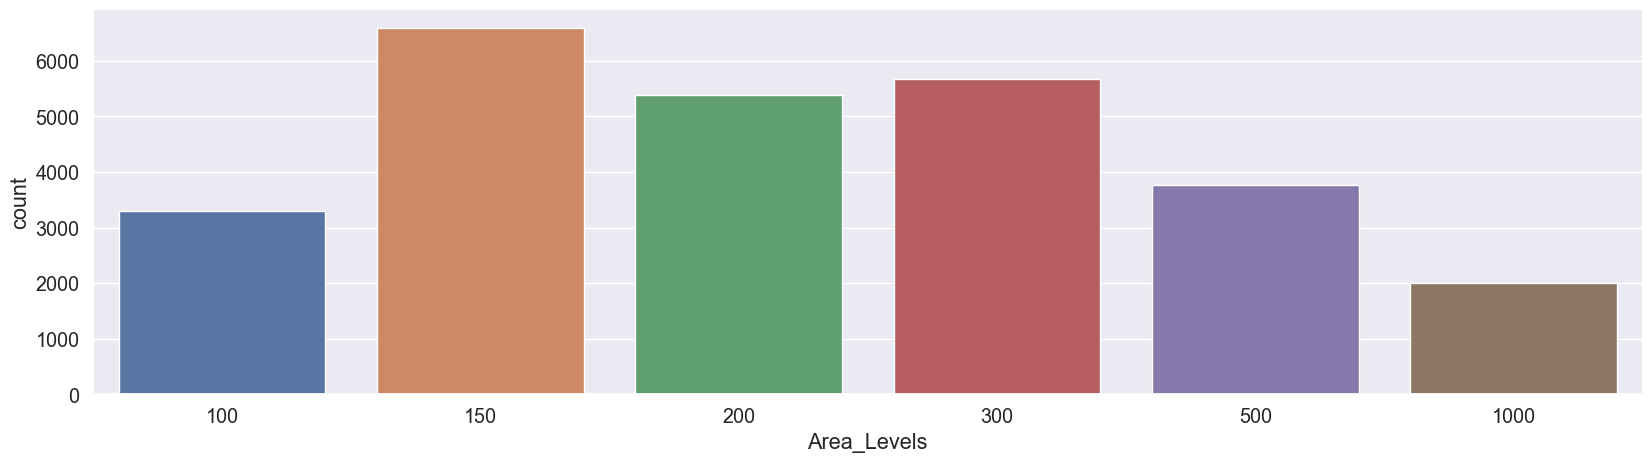

In [60]:
show_countplot('Area_Levels')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

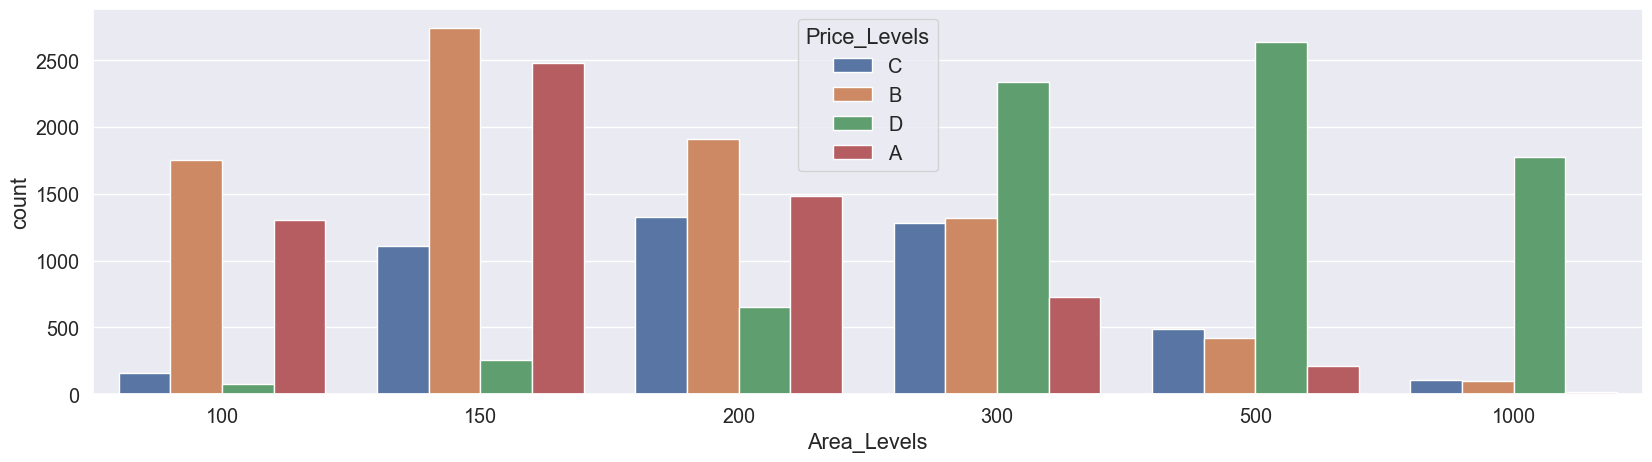

In [61]:
show_countplot_with_hue('Area_Levels','Price_Levels')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

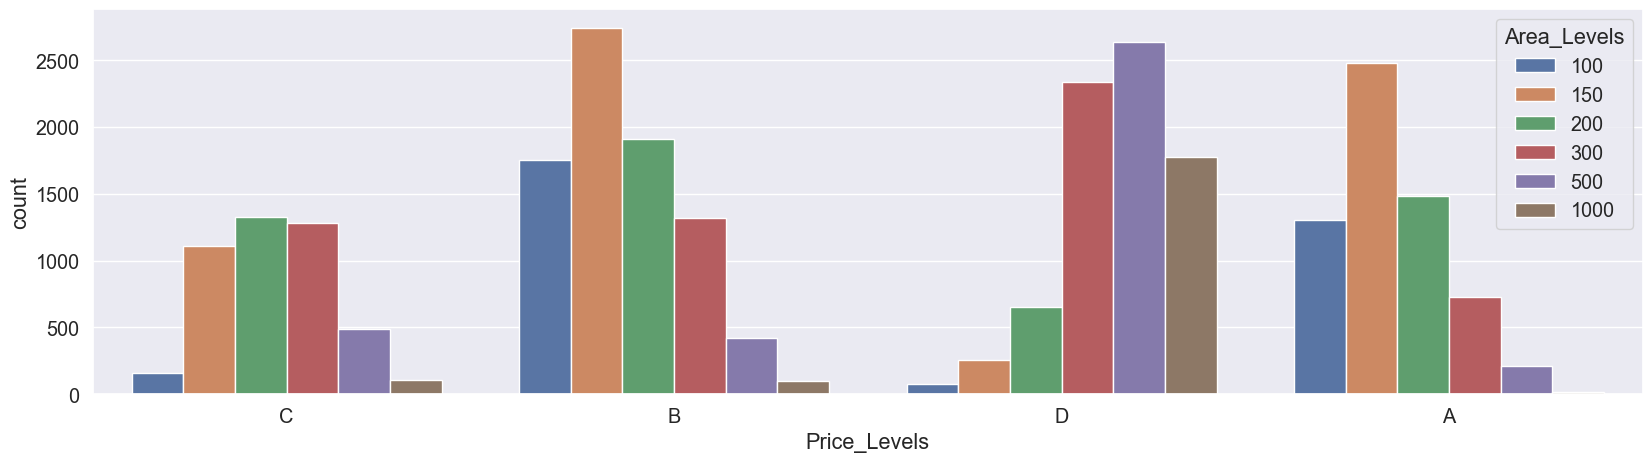

In [62]:
show_countplot_with_hue('Price_Levels', 'Area_Levels')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

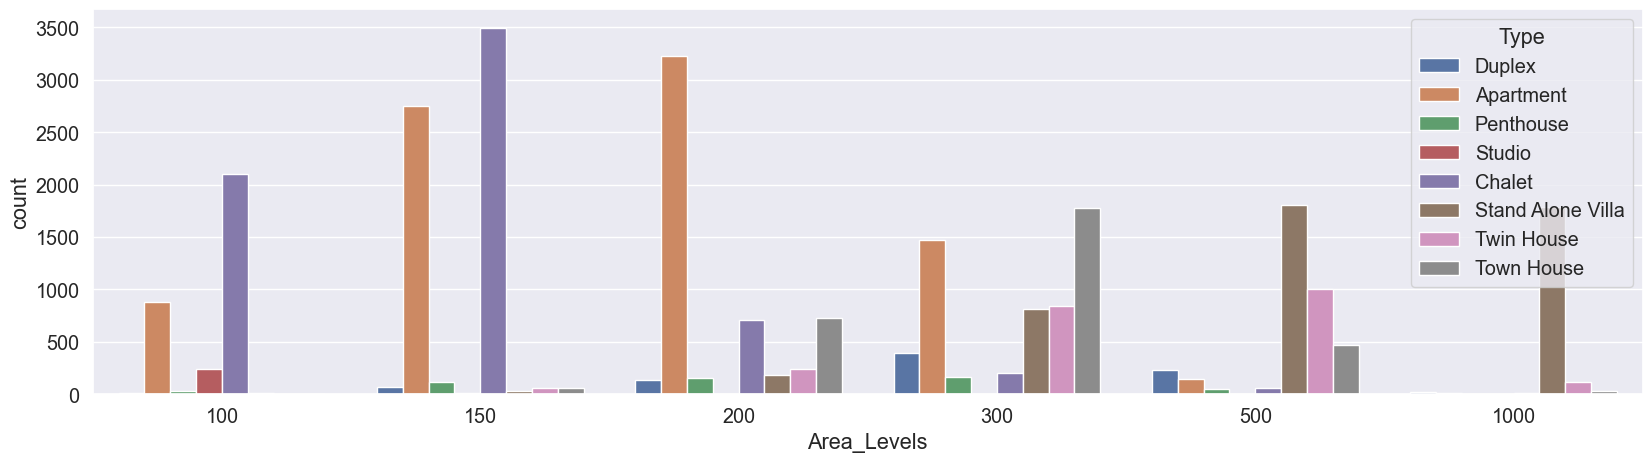

In [63]:
show_countplot_with_hue('Area_Levels','Type')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

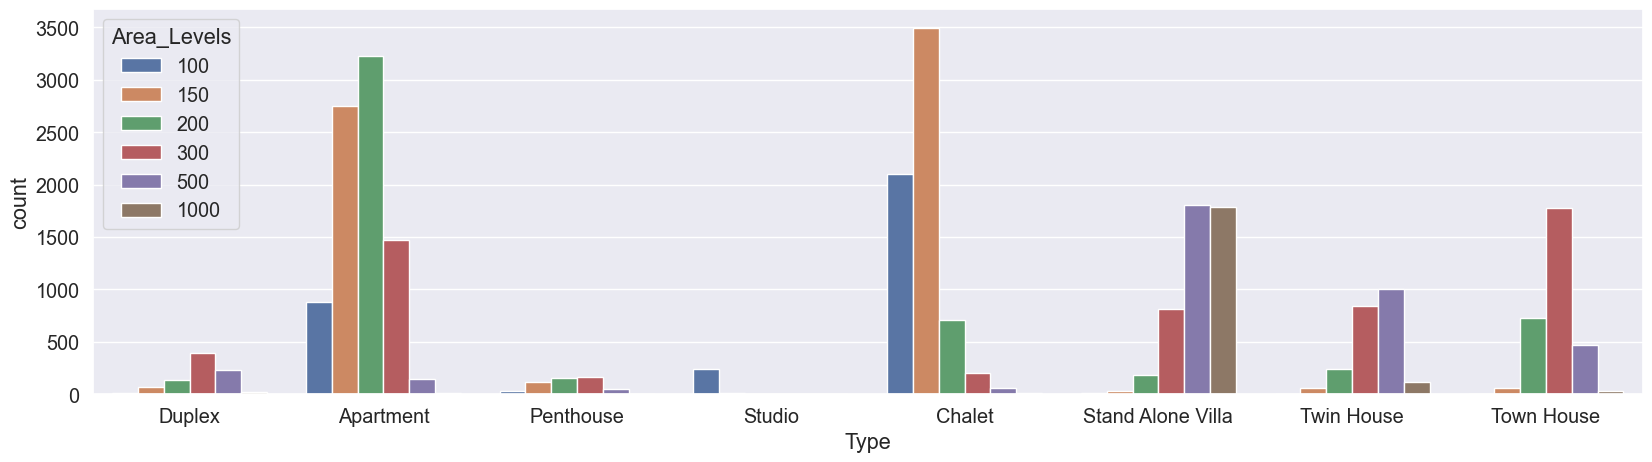

In [64]:
show_countplot_with_hue('Type','Area_Levels')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

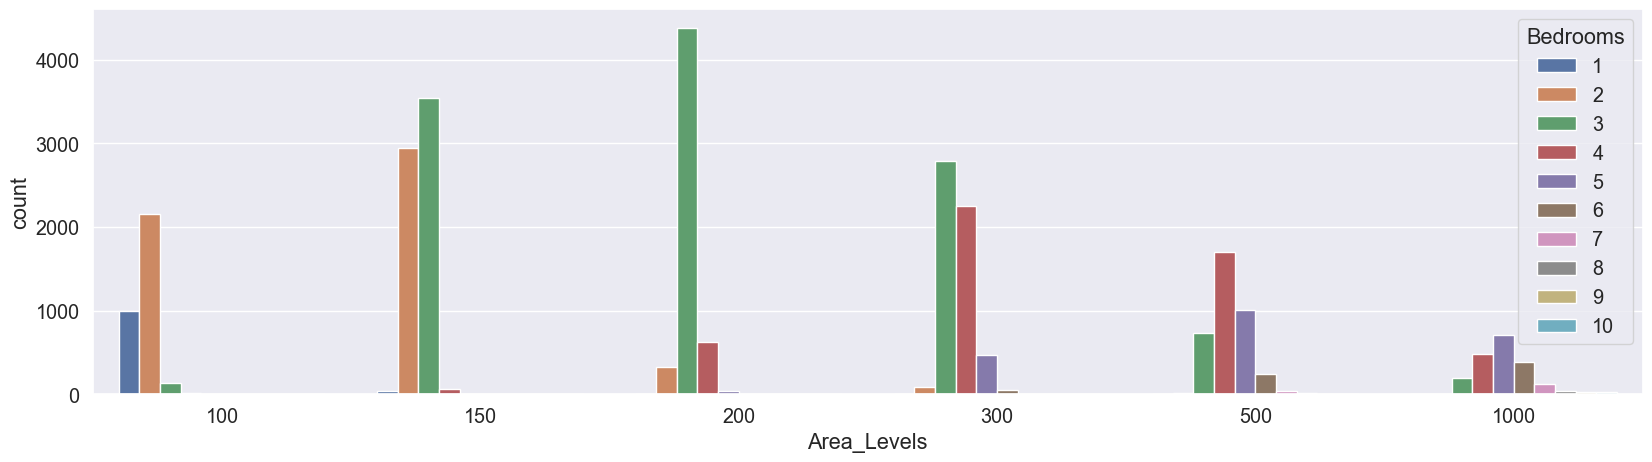

In [65]:
show_countplot_with_hue('Area_Levels', 'Bedrooms')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

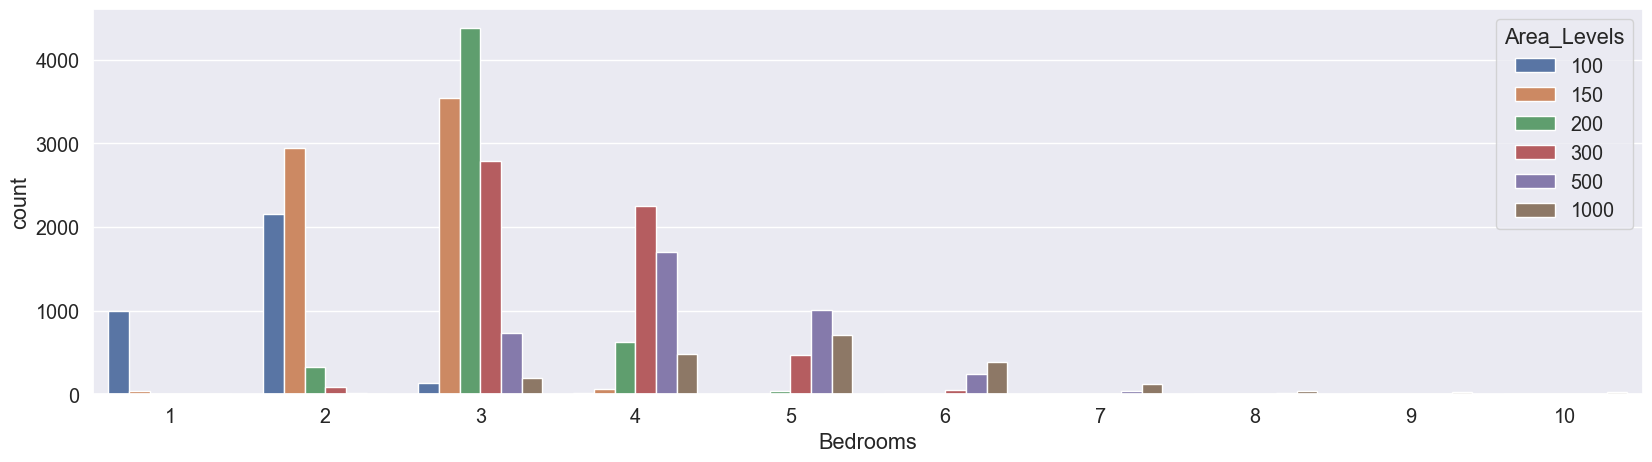

In [66]:
show_countplot_with_hue('Bedrooms', 'Area_Levels')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

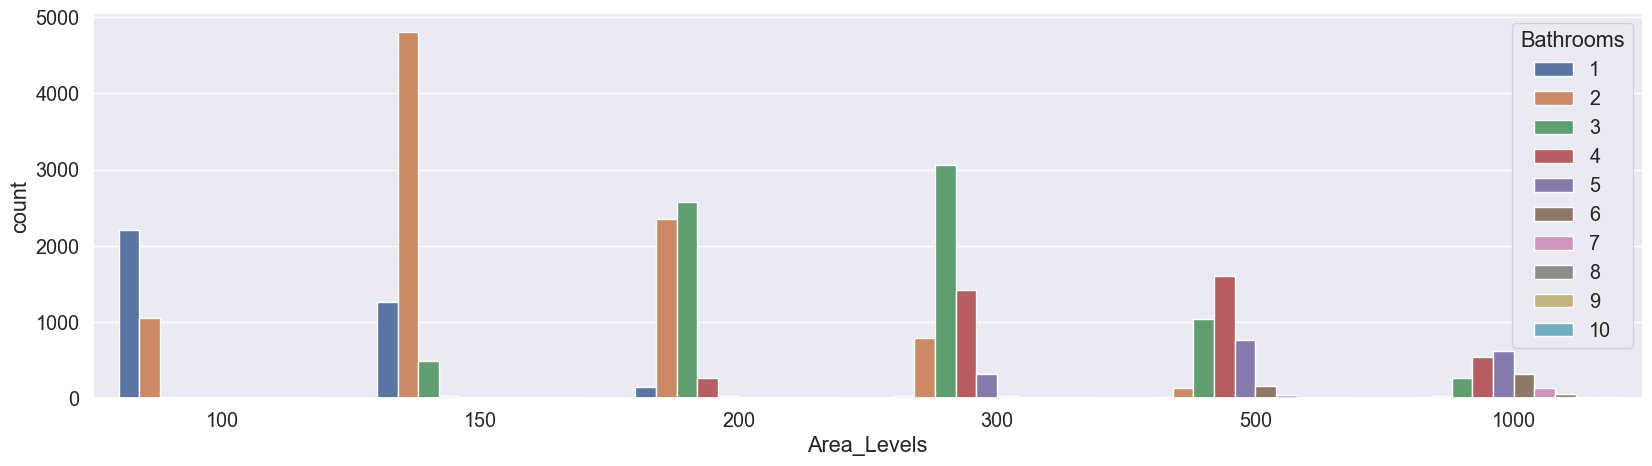

In [67]:
show_countplot_with_hue('Area_Levels', 'Bathrooms')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

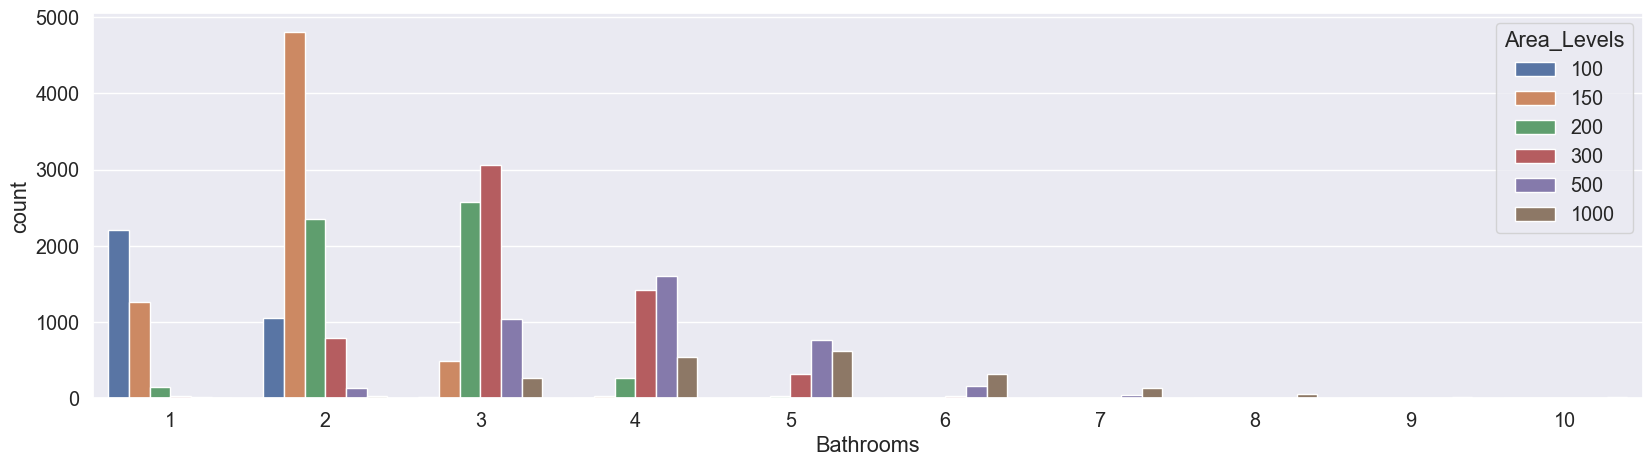

In [68]:
show_countplot_with_hue('Bathrooms', 'Area_Levels')

In [69]:
get_statistical_info_about_col('Area_Levels', 'Price')

Maximum values:
Area_Levels
100      63050003
150      23000000
200      40800000
300      69000000
500     205000000
1000    110000000
Name: Price, dtype: int32
----------------------------------
Minimum values:
Area_Levels
100     30000
150     30000
200     30000
300     30000
500     55000
1000    36000
Name: Price, dtype: int32
----------------------------------
Mean values:
Area_Levels
100      1533136
150      1909974
200      2631488
300      4563916
500      8257011
1000    14226501
Name: Price, dtype: int32
----------------------------------
Median values:
Area_Levels
100      1350000
150      1650000
200      2100000
300      4160000
500      7200000
1000    12000000
Name: Price, dtype: int32
----------------------------------


In [70]:
get_specific_rows('Price', 36000)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City,Price_Levels,Area_Levels
157,Apartment,36000,3,2,161,No,2,Unknown,Cash or Installment,Ready to move,Unknown,New Cairo - El Tagamoa,A,200
10639,Stand Alone Villa,36000,5,5,550,Yes,Ground,Unknown,Cash or Installment,Ready to move,Finished,North Coast,A,1000


In [71]:
df['Furnished'].value_counts()

Furnished
No         16146
Unknown     8341
Yes         2205
Name: count, dtype: int64

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

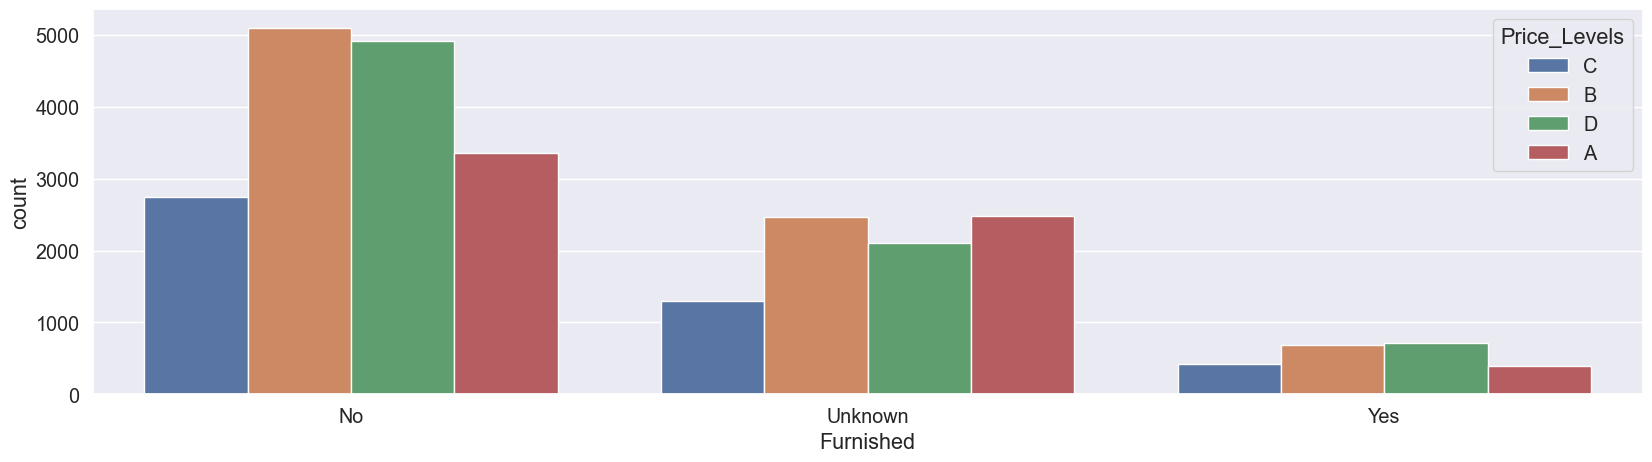

In [72]:
show_countplot_with_hue('Furnished', 'Price_Levels')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

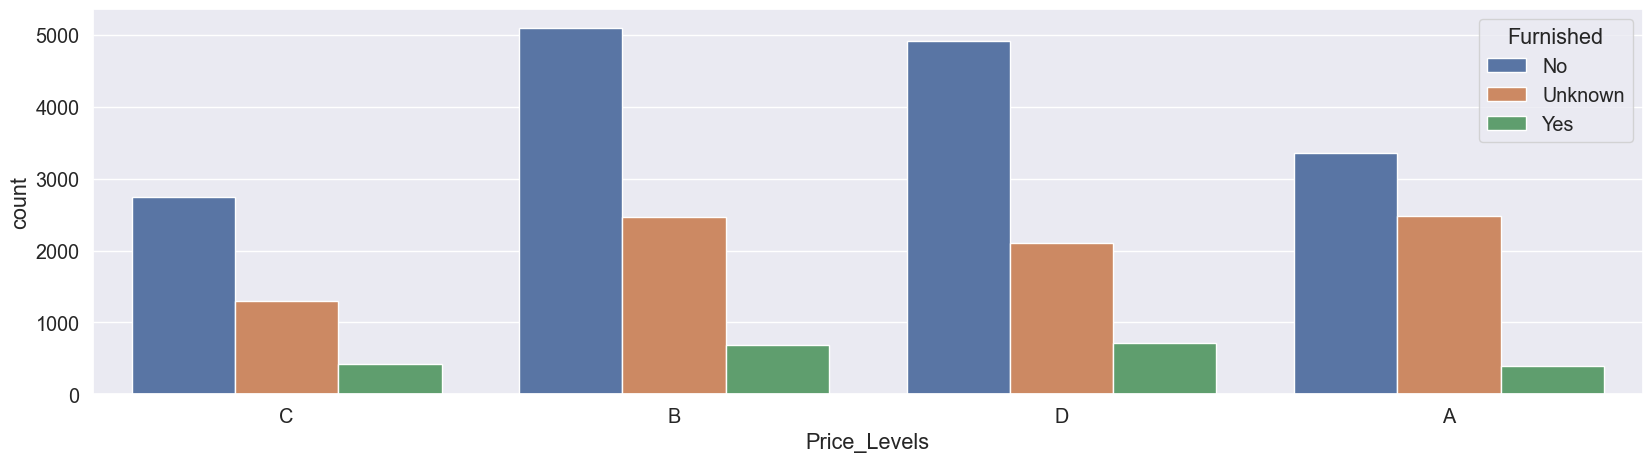

In [73]:
show_countplot_with_hue('Price_Levels', 'Furnished')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

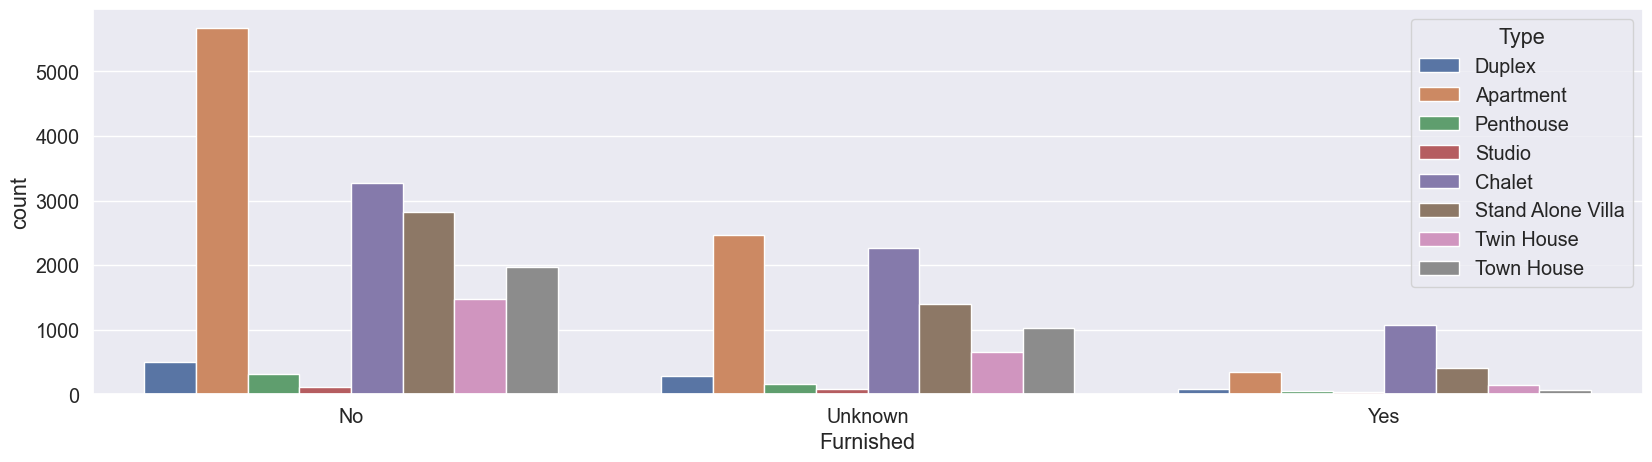

In [74]:
show_countplot_with_hue('Furnished', 'Type')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

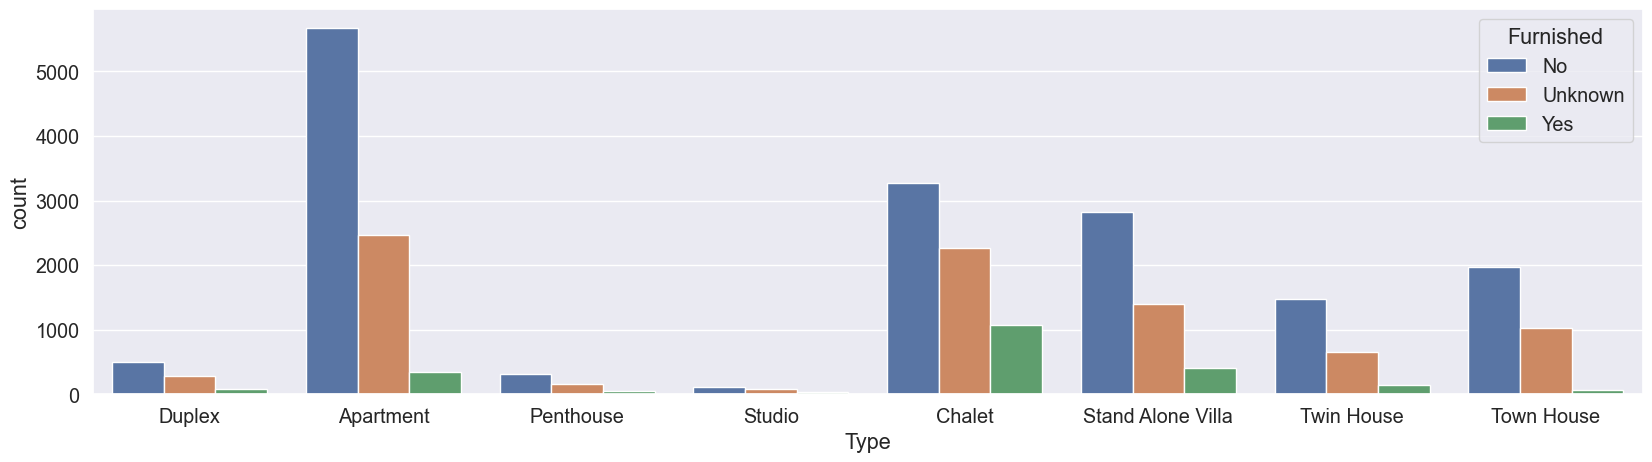

In [75]:
show_countplot_with_hue('Type', 'Furnished')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

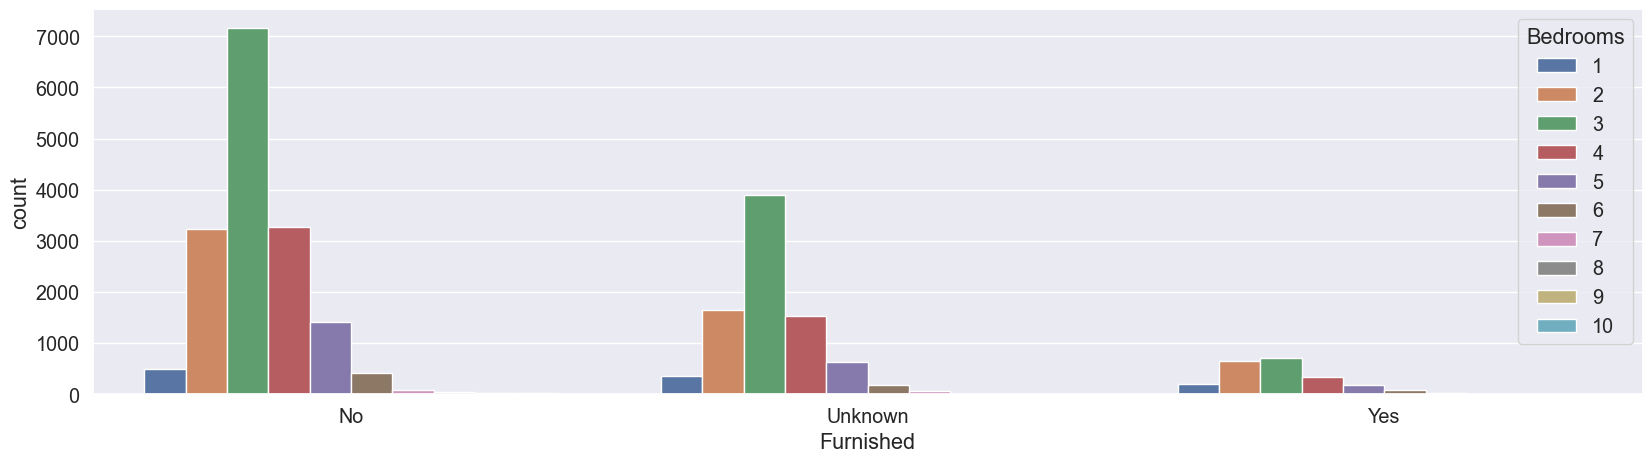

In [76]:
show_countplot_with_hue('Furnished', 'Bedrooms')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

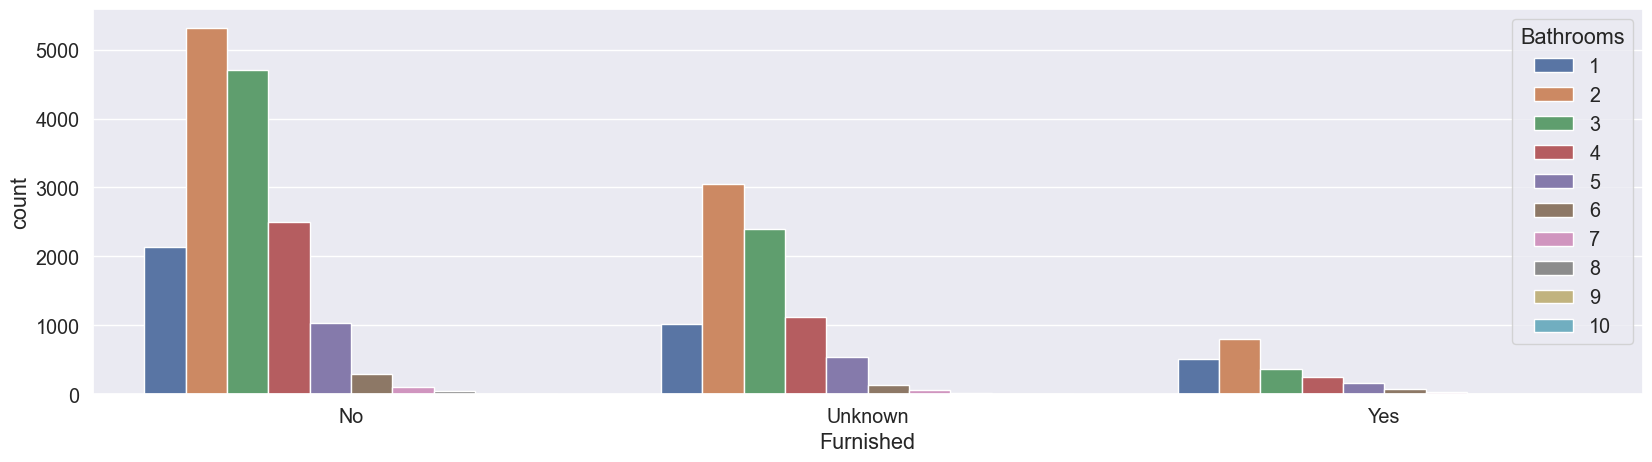

In [77]:
show_countplot_with_hue('Furnished', 'Bathrooms')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

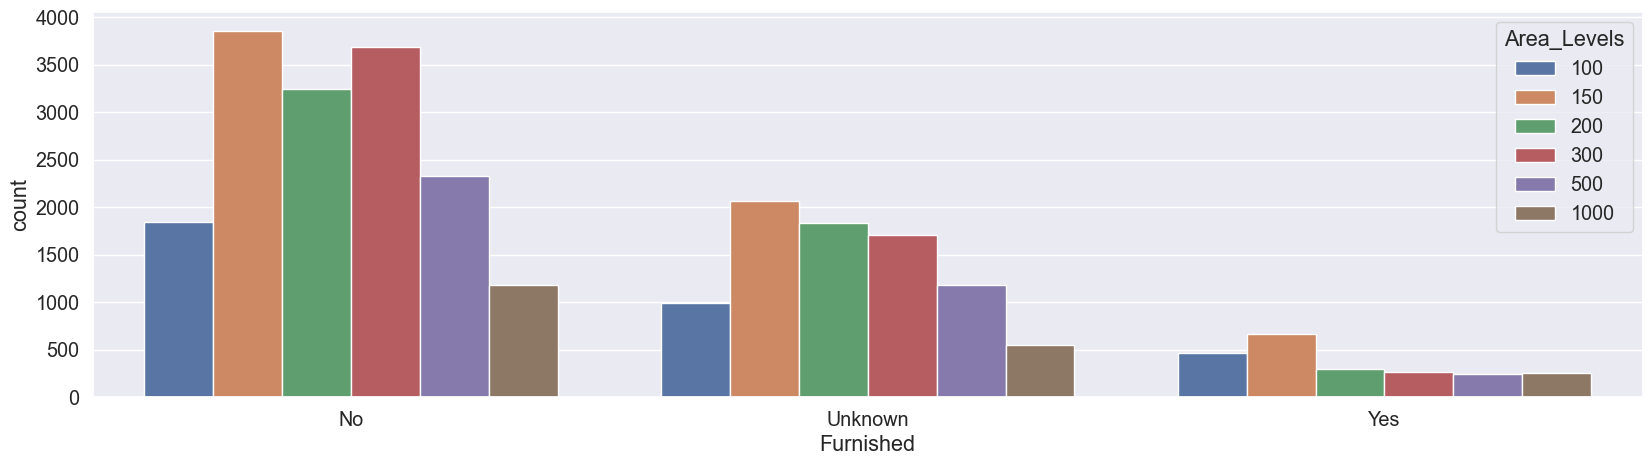

In [78]:
show_countplot_with_hue('Furnished', 'Area_Levels')

In [79]:
get_statistical_info_about_col('Furnished', 'Price')

Maximum values:
Furnished
No         205000000
Unknown     80000000
Yes        110000000
Name: Price, dtype: int32
----------------------------------
Minimum values:
Furnished
No         30000
Unknown    40000
Yes        33000
Name: Price, dtype: int32
----------------------------------
Mean values:
Furnished
No         4410685
Unknown    4030694
Yes        5567565
Name: Price, dtype: int32
----------------------------------
Median values:
Furnished
No         2800000
Unknown    2300000
Yes        3000000
Name: Price, dtype: int32
----------------------------------


In [80]:
df["Level"].value_counts()

Level
Unknown    9796
Ground     4803
2          3727
1          3588
3          2096
4           897
5           575
10+         257
6           223
7           216
Highest     178
8           129
10          104
9           103
Name: count, dtype: int64

In [81]:
# Define the replacements
replacements = {'10+': '10', 'Ground': '0'}

# Replace values in the "Level" column
df['Level'] = df['Level'].replace(replacements)

In [82]:
df["Level"].value_counts()

Level
Unknown    9796
0          4803
2          3727
1          3588
3          2096
4           897
5           575
10          361
6           223
7           216
Highest     178
8           129
9           103
Name: count, dtype: int64

In [83]:
replace_specific_rows('Level', 'Twin house', 'Twin House')

In [84]:
# Define the condition to identify rows to be removed
condition = (df['Level'] == 'Highest')

# Remove rows based on the condition
df = df[~condition]

In [85]:
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City,Price_Levels,Area_Levels
0,Duplex,4000000,3,3,400,No,7,Unknown,Cash,Ready to move,Finished,Nasr City,C,500
1,Apartment,4000000,3,3,160,No,10,Unknown,Cash,Ready to move,Finished,Camp Caesar,C,200
2,Apartment,2250000,3,2,165,No,1,Unknown,Cash,Ready to move,Finished,Smoha,B,200
3,Apartment,1900000,3,2,230,No,10,Unknown,Cash,Ready to move,Finished,Nasr City,B,300
4,Apartment,5800000,2,3,160,No,0,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa,D,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27355,Stand Alone Villa,4800000,4,3,165,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Semi Finished,New Cairo - El Tagamoa,C,200
27356,Town House,890000,3,2,240,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast,A,300
27357,Town House,4000000,4,3,218,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa,C,300
27358,Twin House,13800000,3,4,308,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa,D,500


In [86]:
df["Level"].value_counts()

Level
Unknown    9796
0          4803
2          3727
1          3588
3          2096
4           897
5           575
10          361
6           223
7           216
8           129
9           103
Name: count, dtype: int64

In [87]:
# Replace "Unknown" values with NaN
df['Level'] = df['Level'].replace('Unknown', pd.NA)

# Identify columns for KNN imputation (excluding the 'Level' column)
columns_for_imputation = df.columns.difference(['Level'])

In [88]:
df["Level"].value_counts()

Level
0     4803
2     3727
1     3588
3     2096
4      897
5      575
10     361
6      223
7      216
8      129
9      103
Name: count, dtype: int64

In [89]:
# Get the count of null values in each column
null_counts_per_column = df.isnull().sum()

# Display the result
print(null_counts_per_column)

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished            0
Level             9796
Compound             0
Payment_Option       0
Delivery_Date        0
Delivery_Term        0
City                 0
Price_Levels         1
Area_Levels          0
dtype: int64


In [90]:
df['Level'].value_counts()

Level
0     4803
2     3727
1     3588
3     2096
4      897
5      575
10     361
6      223
7      216
8      129
9      103
Name: count, dtype: int64

In [91]:
df.columns

Index(['Type', 'Price', 'Bedrooms', 'Bathrooms', 'Area', 'Furnished', 'Level',
       'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City',
       'Price_Levels', 'Area_Levels'],
      dtype='object')

In [92]:
# Drop specific columns (e.g., 'B' and 'C')
columns_to_drop = ['Level', 'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City', 'Price']
new_df = df.drop(columns=columns_to_drop)

In [93]:
new_df

,Type,Bedrooms,Bathrooms,Area,Furnished,Price_Levels,Area_Levels
0,Duplex,3,3,400,No,C,500
1,Apartment,3,3,160,No,C,200
2,Apartment,3,2,165,No,B,200
3,Apartment,3,2,230,No,B,300
4,Apartment,2,3,160,No,D,200
...,...,...,...,...,...,...,...
27355,Stand Alone Villa,4,3,165,Unknown,C,200
27356,Town House,3,2,240,Unknown,A,300
27357,Town House,4,3,218,Unknown,C,300
27358,Twin House,3,4,308,No,D,500


In [94]:
# Get the count of null values in each column
null_counts_per_column = new_df.isnull().sum()

# Display the result
print(null_counts_per_column)

Type            0
Bedrooms        0
Bathrooms       0
Area            0
Furnished       0
Price_Levels    1
Area_Levels     0
dtype: int64


In [95]:
# Specify the columns where you want to check for null values
columns_to_check = ['Price_Levels']

# Remove rows with null values in the specified columns
new_df = new_df.dropna(subset=columns_to_check)

In [96]:
# Get the count of null values in each column
null_counts_per_column = new_df.isnull().sum()

# Display the result
print(null_counts_per_column)

Type            0
Bedrooms        0
Bathrooms       0
Area            0
Furnished       0
Price_Levels    0
Area_Levels     0
dtype: int64


In [97]:
new_df 

,Type,Bedrooms,Bathrooms,Area,Furnished,Price_Levels,Area_Levels
0,Duplex,3,3,400,No,C,500
1,Apartment,3,3,160,No,C,200
2,Apartment,3,2,165,No,B,200
3,Apartment,3,2,230,No,B,300
4,Apartment,2,3,160,No,D,200
...,...,...,...,...,...,...,...
27355,Stand Alone Villa,4,3,165,Unknown,C,200
27356,Town House,3,2,240,Unknown,A,300
27357,Town House,4,3,218,Unknown,C,300
27358,Twin House,3,4,308,No,D,500


In [98]:
price_dict = {'A':1, 'B':2, 'C':3, 'D':4}

In [99]:
new_df['Price'] = new_df['Price_Levels'].map(price_dict)

In [100]:
columns_to_drop = ['Price_Levels']
new_df = new_df.drop(columns=columns_to_drop)

In [101]:
Furnished_dict = {'Unknown':0, 'Yes':1, 'No':2}

In [102]:
new_df['Furnished'] = new_df['Furnished'].map(Furnished_dict)

In [103]:
new_df

,Type,Bedrooms,Bathrooms,Area,Furnished,Area_Levels,Price
0,Duplex,3,3,400,2,500,3
1,Apartment,3,3,160,2,200,3
2,Apartment,3,2,165,2,200,2
3,Apartment,3,2,230,2,300,2
4,Apartment,2,3,160,2,200,4
...,...,...,...,...,...,...,...
27355,Stand Alone Villa,4,3,165,0,200,3
27356,Town House,3,2,240,0,300,1
27357,Town House,4,3,218,0,300,3
27358,Twin House,3,4,308,2,500,4


In [104]:
df["Type"].value_counts()

Type
Apartment            8450
Chalet               6549
Stand Alone Villa    4632
Town House           3067
Twin House           2270
Duplex                838
Penthouse             459
Studio                249
Name: count, dtype: int64

In [105]:
type_dict = {'Apartment':1, 'Chalet':2, 'Stand Alone Villa':3, 'Town House':4, 'Twin House':5, 'Duplex':6, 'Penthouse':7, 'Studio':8}

In [106]:
new_df['Type'] = new_df['Type'].map(type_dict)

In [107]:
corr = new_df.corr()
corr

,Type,Bedrooms,Bathrooms,Area,Furnished,Area_Levels,Price
Type,1.000000,0.298656,0.363977,0.305302,-0.011791,0.298621,0.365827
Bedrooms,0.298656,1.000000,0.815212,0.726831,0.030615,0.699323,0.486126
Bathrooms,0.363977,0.815212,1.000000,0.747766,0.018956,0.718260,0.603613
Area,0.305302,0.726831,0.747766,1.000000,0.020766,0.958632,0.568218
Furnished,-0.011791,0.030615,0.018956,0.020766,1.000000,0.017769,0.077382
Area_Levels,0.298621,0.699323,0.718260,0.958632,0.017769,1.000000,0.547776
Price,0.365827,0.486126,0.603613,0.568218,0.077382,0.547776,1.000000


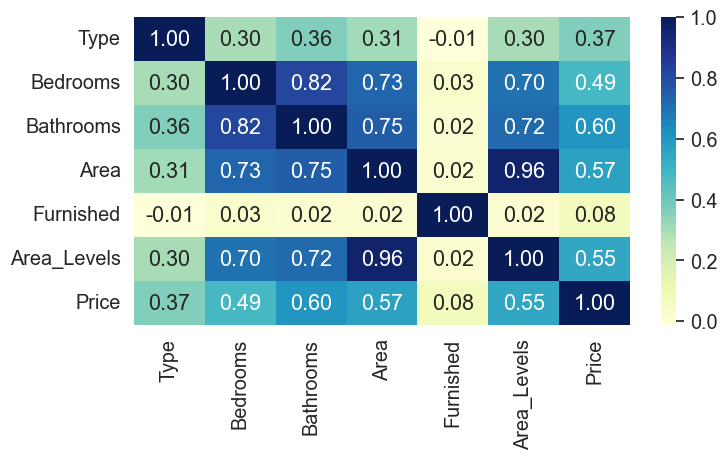

In [108]:
plt.figure(figsize = (8, 4))
sns.heatmap(data=corr, annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()

In [109]:
x = new_df.drop(['Price'], axis=1)
y = new_df['Price']

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)     

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [111]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Train Score', model.score(x_train, y_train))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

Train Score 0.7720886374351721
Accuracy Score: 0.5994719969828399


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.51      0.52      1236
           2       0.57      0.67      0.62      1639
           3       0.46      0.33      0.39       883
           4       0.74      0.75      0.74      1545

    accuracy                           0.60      5303
   macro avg       0.58      0.57      0.57      5303
weighted avg       0.59      0.60      0.59      5303



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

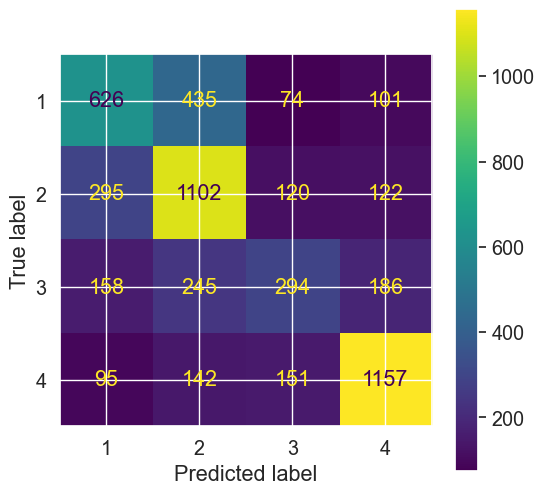

In [113]:
# Assuming you already have 'y_test', 'y_pred', 'model.classes_'
predictions = y_pred
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Adjust the figure size using figsize
fig, ax = plt.subplots(figsize=(6, 6))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=ax)

# Show the plot
plt.show()

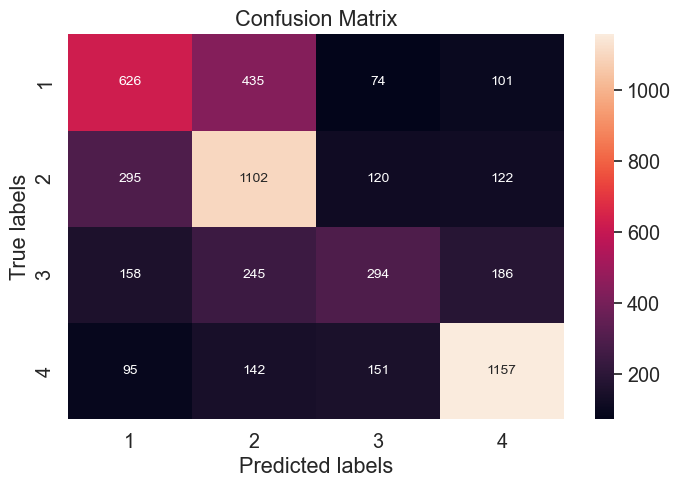

In [114]:
# Adjust the figure size using figsize
fig, ax = plt.subplots(figsize=(8, 5))

# Adjust the heatmap size and annotation font size
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 10})

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels
ax.xaxis.set_ticklabels(["1", "2", "3", "4"])
ax.yaxis.set_ticklabels(["1", "2", "3", "4"])

# Show the plot
plt.show()

In [115]:
# Save the model weights
joblib.dump(model, r'E:\egyptian house\egyptian_houses_prices.joblib')

['E:\\egyptian house\\egyptian_houses_prices.joblib']